# IMAGE CLASSIFICATION PROJECT

In [2]:
from IPython.display import Image
Image(url= "https://i2.wp.com/www.denim-fever.net/wp-content/uploads/2019/07/denim-jeans-1475839012-2411233.jpeg?fit=800%2C292&ssl=1")

In [1]:
!pip install opencv-python

In [3]:
!pip install Keras

In [1]:
!pip install tensorflow

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 228, in _main
    status = self.run(options, args)
  File "C:\Users\user\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 182, in wrapper
    return func(self, options, args)
  File "C:\Users\user\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 323, in run
    requirement_set = resolver.resolve(
  File "C:\Users\user\anaconda3\lib\site-packages\pip\_internal\resolution\legacy\resolver.py", line 183, in resolve
    discovered_reqs.extend(self._resolve_one(requirement_set, req))
  File "C:\Users\user\anaconda3\lib\site-packages\pip\_internal\resolution\legacy\resolver.py", line 388, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "C:\Users\user\anaconda3\lib\site-packages\pip\_internal\resolution\legacy\resolver.py", line 331, in _get_abstract_dist_for
    skip_reason 


  Using cached tensorflow-2.7.0-cp38-cp38-win_amd64.whl (430.8 MB)
  Using cached libclang-12.0.0-py2.py3-none-win_amd64.whl (13.1 MB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.1-cp38-cp38-win_amd64.whl (895 kB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached tensorflow_io_gcs_filesystem-0.22.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
Processing c:\users\user\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501\termcolor-1.1.0-py3-none-any.whl
  Using cached grpcio-

# Introduction

##### Image classification (or Image recognition) is a subdomain of computer vision in which an algorithm looks at an image and assigns it a tag from a collection of predefined tags or categories that it has been trained on.

##### Vision is responsible for 80-85 percent of our perception of the world, and we, as human beings, trivially perform classification daily on whatever data we come across.

##### Image classification is the process of categorizing and labeling groups of pixels or vectors within an image based on specific rules. The categorization law can be devised using one or more spectral or textural characteristics. Two general methods of classification are 'supervised' and 'unsupervised'.
##### Image classification is a complex procedure which relies on different components. Here, some of the presented strategies, issues and additional prospects of image orders are addressed. The primary spotlight will be on cutting edge classification methods which are utilized for enhancing characterization precision. 

### Import Libraries

In [56]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import pickle
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

#### Above I am importing all the important Libraries in one go so that I can use these libraries to make good Model Prediction.

### Loading Directory

In [57]:
DIRECTORY = r'D:\Flip robo tech\Assignment 14\Dataset'
CATEGORY = ['jeans', 'saree', 'Trousers']

#### Loading the path from directory to read the images for a dataset.

In [58]:
for categories in CATEGORY:
    folder = os.path.join(DIRECTORY, categories)
    print(folder)

D:\Flip robo tech\Assignment 14\Dataset\jeans
D:\Flip robo tech\Assignment 14\Dataset\saree
D:\Flip robo tech\Assignment 14\Dataset\Trousers


In [59]:
for categories in CATEGORY:
    folder = os.path.join(DIRECTORY, categories)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        print(img_path)
        break

D:\Flip robo tech\Assignment 14\Dataset\jeans\Jeans0.jpg
D:\Flip robo tech\Assignment 14\Dataset\saree\saree0.jpg
D:\Flip robo tech\Assignment 14\Dataset\Trousers\Trousers0.jpg


##### Loading all the cateogory into jpeg.extension

### Exploratory Data Analysis

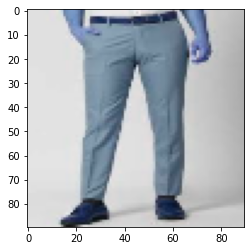

In [60]:
IMG_SIZE = 90

for categories in CATEGORY:
    folder = os.path.join(DIRECTORY, categories)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        plt.imshow(img_arr)
        break

#### By using os converting all the images.

In [61]:
data = []

for category in CATEGORY:
    path = os.path.join(DIRECTORY, categories)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORY.index(categories)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (60, 60))
        data.append([new_arr, label])

In [62]:
data

[[array([[224, 224, 224, ..., 192, 189, 187],
         [224, 224, 224, ..., 190, 188, 185],
         [224, 224, 224, ..., 189, 187, 184],
         ...,
         [221, 221, 221, ..., 200, 200, 200],
         [224, 224, 224, ..., 200, 201, 201],
         [226, 226, 226, ..., 204, 202, 202]], dtype=uint8),
  2],
 [array([[255, 255, 255, ..., 108,  85, 118],
         [255, 255, 255, ...,  89,  80,  95],
         [255, 255, 253, ..., 100, 111,  70],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  2],
 [array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  2],
 [array([[243, 243, 242, ..., 227, 227, 227],
         [243, 243, 2

#### Converting all the dataset into array.

In [63]:
len(data)

747

#### Checking the len values which shows 747 images included in this project.

In [64]:
random.shuffle(data)

In [65]:
data[0]

[array([[225, 225, 224, ..., 220, 220, 220],
        [225, 225, 224, ..., 220, 220, 220],
        [226, 226, 225, ..., 221, 220, 220],
        ...,
        [222, 221, 220, ..., 216, 216, 216],
        [222, 221, 220, ..., 215, 216, 216],
        [222, 221, 220, ..., 215, 216, 216]], dtype=uint8),
 2]

#### Shuffling all the data to make a proper dataset for model prediction.

In [66]:
x = []
y = []

for features, labels in data:
    x.append(features)
    y.append(labels)

In [67]:
x = np.array(x)
y = np.array(y)

##### Appending features & label into a data. 

In [68]:
len(x)

747

In [69]:
pickle.dump(x, open('x.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

#### Saving files through using dump.pickle options.

## Training Model

In [70]:
x = pickle.load(open('x.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

In [71]:
x

array([[[225, 225, 224, ..., 220, 220, 220],
        [225, 225, 224, ..., 220, 220, 220],
        [226, 226, 225, ..., 221, 220, 220],
        ...,
        [222, 221, 220, ..., 216, 216, 216],
        [222, 221, 220, ..., 215, 216, 216],
        [222, 221, 220, ..., 215, 216, 216]],

       [[245, 245, 245, ..., 245, 245, 245],
        [245, 245, 245, ..., 245, 245, 245],
        [245, 245, 245, ..., 245, 245, 245],
        ...,
        [255, 255, 255, ..., 253, 255, 255],
        [255, 255, 255, ..., 250, 255, 255],
        [255, 255, 255, ..., 252, 255, 255]],

       [[223, 219, 215, ..., 240, 238, 237],
        [223, 219, 215, ..., 240, 238, 237],
        [223, 219, 216, ..., 239, 240, 238],
        ...,
        [233, 234, 235, ..., 235, 236, 236],
        [234, 234, 234, ..., 234, 235, 235],
        [234, 234, 234, ..., 234, 235, 235]],

       ...,

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255

In [72]:
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [73]:
x = x/255

In [74]:
x.shape

(747, 60, 60)

#### Using shape function to understand image size of a file.